In [22]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import os
import cv2
from tqdm import tqdm

# use seaborn plotting defaults
import seaborn as sns; sns.set()

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import KernelPCA, PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog

In [23]:
!pip install albumentations

Defaulting to user installation because normal site-packages is not writeable


In [24]:

dirname_train = "/home/artem/StartML_AMI/train"
dirname_test = "/home/artem/StartML_AMI/test"

In [25]:
import random
import albumentations as A

from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, RandomBrightnessContrast, Flip, OneOf, Compose
)

def get_aug(image):
    angle = np.arange(-10,11,1)
    angle0 = random.choice(angle)

    shift = 0.01*np.arange(-10,11,1)
    shift0 = random.choice(shift)

    transform = A.Compose([
    A.ShiftScaleRotate(shift_limit=[shift0,shift0], scale_limit=0, 
                        rotate_limit=[angle0,angle0], p=0.5),
    A.HorizontalFlip(p=0.5),
    #A.PiecewiseAffine(p=0.3),
    A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.3),
    A.GaussNoise(var_limit=(10,250), p=0.5)
    ])
    return transform(image=image)['image']

1. ### Upload and applying Haar cascade with augmentations.

In [4]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

ModuleNotFoundError: No module named 'google.colab'

In [45]:
X_train, y_train, X_train3 = [], [], []

X_no_haar = []

X_train_Aug, y_train_Aug = [], []
X_no_haar_Aug = []
no_face = 0
filelist = os.listdir(dirname_train)

l = ['haarcascade_frontalface_alt.xml', 'haarcascade_frontalface_alt2.xml',
     'haarcascade_frontalface_default.xml']#,'haarcascade_frontalcatface_extended.xml', 'haarcascade_frontalcatface.xml', 'haarcascade_frontalface_alt_tree.xml']

for fname in filelist:
    img = cv2.imread(os.path.join(dirname_train, fname), cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (1920, 1920), interpolation=cv2.INTER_AREA)
    X_train.append(img)
    #X_no_haar.append(img)
    y_train.append(int(fname.split('label')[1].split('.')[0]))

for (a,b) in zip(X_train,y_train):
    for i in range(3):
        X_train3.append(get_aug(a))
        #X_no_haar.append(get_aug(a))
        #X_train3.append(a)
        y_train_Aug.append(b)
        #break

for img in X_train3:    
    for haar in l:
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + haar)
        face = face_cascade.detectMultiScale(img)
        if len(face):
          break
    for (a, b, w, h) in face:
        cv2.rectangle(img, (a, b), (a + w, b + h), (0, 0, 1920), 2)
        face = img[b:b + h, a:a + w]
    
    try:
        h, w = face.shape
        size = min(h, w)
        h0 = int((h - size) / 2)
        w0 = int((w - size) / 2)
            
        img = face[h0: h0 + size, w0: w0 + size]

    except:
        no_face+=1


    img = cv2.resize(img, (64, 64), interpolation = cv2.INTER_AREA)    
    #X_no_haar_Aug.append(img)
    X_train_Aug.append(img)
    

print(no_face,'faces were not found')

len(X_train_Aug), len(y_train_Aug)

[CV] END pca__kernel=linear, pca__n_components=150, svm__C=11, svm__kernel=poly; total time=   8.8s
[CV] END pca__kernel=linear, pca__n_components=150, svm__C=13, svm__kernel=rbf; total time=  10.5s
[CV] END pca__kernel=linear, pca__n_components=150, svm__C=13, svm__kernel=poly; total time=  10.3s
[CV] END pca__kernel=linear, pca__n_components=150, svm__C=13, svm__kernel=linear; total time=   9.7s
[CV] END pca__kernel=linear, pca__n_components=155, svm__C=1, svm__kernel=poly; total time=   9.3s
[CV] END pca__kernel=linear, pca__n_components=155, svm__C=1, svm__kernel=linear; total time=   5.8s
[CV] END pca__kernel=linear, pca__n_components=155, svm__C=3, svm__kernel=rbf; total time=  11.4s
[CV] END pca__kernel=linear, pca__n_components=155, svm__C=3, svm__kernel=poly; total time=   8.5s
[CV] END pca__kernel=linear, pca__n_components=155, svm__C=3, svm__kernel=linear; total time=   7.4s
[CV] END pca__kernel=linear, pca__n_components=155, svm__C=5, svm__kernel=rbf; total time=  10.4s
[CV

[CV] END pca__kernel=linear, pca__n_components=155, svm__C=1, svm__kernel=rbf; total time=  11.4s
[CV] END pca__kernel=linear, pca__n_components=155, svm__C=1, svm__kernel=poly; total time=  10.6s
[CV] END pca__kernel=linear, pca__n_components=155, svm__C=1, svm__kernel=linear; total time=   9.3s
[CV] END pca__kernel=linear, pca__n_components=155, svm__C=3, svm__kernel=poly; total time=   8.8s
[CV] END pca__kernel=linear, pca__n_components=155, svm__C=3, svm__kernel=linear; total time=   7.1s
[CV] END pca__kernel=linear, pca__n_components=155, svm__C=5, svm__kernel=rbf; total time=  10.8s
[CV] END pca__kernel=linear, pca__n_components=155, svm__C=5, svm__kernel=poly; total time=   9.1s
[CV] END pca__kernel=linear, pca__n_components=155, svm__C=5, svm__kernel=linear; total time=   8.1s
[CV] END pca__kernel=linear, pca__n_components=155, svm__C=7, svm__kernel=rbf; total time=   9.8s
[CV] END pca__kernel=linear, pca__n_components=155, svm__C=7, svm__kernel=linear; total time=   6.7s
[CV] 

[CV] END pca__kernel=linear, pca__n_components=155, svm__C=3, svm__kernel=poly; total time=   9.2s
[CV] END pca__kernel=linear, pca__n_components=155, svm__C=5, svm__kernel=rbf; total time=  11.0s
[CV] END pca__kernel=linear, pca__n_components=155, svm__C=5, svm__kernel=poly; total time=   9.7s
[CV] END pca__kernel=linear, pca__n_components=155, svm__C=5, svm__kernel=linear; total time=   8.6s
[CV] END pca__kernel=linear, pca__n_components=155, svm__C=7, svm__kernel=poly; total time=   8.1s
[CV] END pca__kernel=linear, pca__n_components=155, svm__C=7, svm__kernel=linear; total time=   6.9s
[CV] END pca__kernel=linear, pca__n_components=155, svm__C=9, svm__kernel=rbf; total time=  11.3s
[CV] END pca__kernel=linear, pca__n_components=155, svm__C=9, svm__kernel=poly; total time=   8.6s
[CV] END pca__kernel=linear, pca__n_components=155, svm__C=9, svm__kernel=linear; total time=   6.2s
[CV] END pca__kernel=linear, pca__n_components=155, svm__C=11, svm__kernel=rbf; total time=   9.8s
[CV] E

[CV] END pca__kernel=linear, pca__n_components=155, svm__C=5, svm__kernel=linear; total time=   7.5s
[CV] END pca__kernel=linear, pca__n_components=155, svm__C=7, svm__kernel=rbf; total time=  11.5s
[CV] END pca__kernel=linear, pca__n_components=155, svm__C=7, svm__kernel=poly; total time=   8.7s
[CV] END pca__kernel=linear, pca__n_components=155, svm__C=7, svm__kernel=linear; total time=   6.1s
[CV] END pca__kernel=linear, pca__n_components=155, svm__C=9, svm__kernel=rbf; total time=  10.2s
[CV] END pca__kernel=linear, pca__n_components=155, svm__C=9, svm__kernel=poly; total time=   9.3s
[CV] END pca__kernel=linear, pca__n_components=155, svm__C=9, svm__kernel=linear; total time=   9.1s
[CV] END pca__kernel=linear, pca__n_components=155, svm__C=11, svm__kernel=poly; total time=   8.6s
[CV] END pca__kernel=linear, pca__n_components=155, svm__C=11, svm__kernel=linear; total time=   6.2s
[CV] END pca__kernel=linear, pca__n_components=155, svm__C=13, svm__kernel=rbf; total time=  11.7s
[C

(1863, 1863)

#### Alternative read without Haar 

In [4]:
X_train, y_train, X_train3 = [], [], []

X_no_haar = []

X_train_Aug, y_train_Aug = [], []
X_no_haar_Aug = []
no_face = 0
filelist = os.listdir(dirname_train)

l = ['haarcascade_frontalface_alt.xml', 'haarcascade_frontalface_alt2.xml',
     'haarcascade_frontalface_default.xml']#, 'haarcascade_frontalcatface_extended.xml', 'haarcascade_frontalcatface.xml', 'haarcascade_frontalface_alt_tree.xml']

for fname in filelist:
    img = cv2.imread(os.path.join(dirname_train, fname), cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (1920, 1920), interpolation=cv2.INTER_AREA)
    X_train.append(img)
    X_no_haar.append(img)
    y_train.append(int(fname.split('label')[1].split('.')[0]))

for (a,b) in zip(X_train,y_train):
    for i in range(5):
        X_train3.append(get_aug(a))
        X_no_haar.append(get_aug(a))
        #X_train3.append(a)
        y_train_Aug.append(b)
        #break

for img in X_train3:   
    '''
    for haar in l:
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + haar)
        face = face_cascade.detectMultiScale(img, minNeighbors=2)
        if len(face):
          break
    for (a, b, w, h) in face:
        cv2.rectangle(img, (a, b), (a + w, b + h), (0, 0, 1080), 2)
        face = img[b:b + h, a:a + w]
    
    try:
        h, w = face.shape
        size = min(h, w)
        h0 = int((h - size) / 2)
        w0 = int((w - size) / 2)
            
        img = face[h0: h0 + size, w0: w0 + size]

    except:
        no_face+=1

    '''
    img = cv2.resize(img, (128, 128), interpolation = cv2.INTER_AREA)    
    #X_no_haar_Aug.append(img)
    X_train_Aug.append(img)
    

print(no_face,'faces were not found')

len(X_train_Aug), len(y_train_Aug)

0 faces were not found


(3105, 3105)

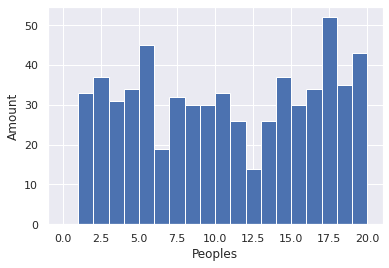

In [27]:
bins = np.arange(0, 21, 1) 

plt.hist(y_train, bins=bins, alpha=1)
plt.xlabel('Peoples')
plt.ylabel('Amount')

plt.show()

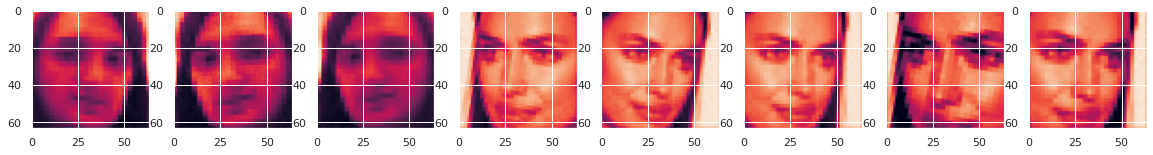

In [28]:
fig, axx = plt.subplots(1, 8, figsize=(20, 10))

for i in range(8):
    img = X_train_Aug[i+62]
    axx[i].imshow(img)

### Downscale test dataset to (64, 64)

In [29]:
def sort_by_index(fname):
    return int(fname.split('.')[0].split('img')[1])

In [30]:
X_test = []
Names = []
no_face = 0
#X_test_no_haar = []

for fname in tqdm(sorted(os.listdir(dirname_test), key=sort_by_index)):
    img = cv2.imread(os.path.join(dirname_test, fname), cv2.IMREAD_GRAYSCALE)
    #X_test_no_haar.append(img)
    img = cv2.resize(img, (1920, 1920), interpolation=cv2.INTER_AREA)
    
    Names.append(fname)
    l = ['haarcascade_frontalface_alt.xml', 'haarcascade_frontalface_alt2.xml',
     'haarcascade_frontalface_default.xml']#, 'haarcascade_frontalcatface_extended.xml', 'haarcascade_frontalcatface.xml', 'haarcascade_frontalface_alt_tree.xml']


    
    for haar in l:
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + haar)
        face = face_cascade.detectMultiScale(img)
        if len(face):
          break
    for (a, b, w, h) in face:
        cv2.rectangle(img, (a, b), (a + w, b + h), (0, 0, 1920), 2)
        face = img[b:b + h, a:a + w]
    
    try:
        h, w = face.shape
        size = min(h, w)
        h0 = int((h - size) / 2)
        w0 = int((w - size) / 2)
            
        img = face[h0: h0 + size, w0: w0 + size]

    except:
        no_face+=1

    
    img = cv2.resize(img, (64, 64), interpolation = cv2.INTER_AREA)
    X_test.append(img)
    
print(no_face,'faces were not found')
len(X_test)

100%|███████████████████████████████████████| 4150/4150 [15:18<00:00,  4.52it/s]

281 faces were not found


4150

#### Again, without Haar

In [6]:
X_test = []
Names = []
no_face = 0
X_test_no_haar = []

for fname in tqdm(sorted(os.listdir(dirname_test), key=sort_by_index)):
    img = cv2.imread(os.path.join(dirname_test, fname), cv2.IMREAD_GRAYSCALE)
    #X_test_no_haar.append(img)
    img = cv2.resize(img, (1920, 1920), interpolation=cv2.INTER_AREA)
    
    Names.append(fname)
    '''
    l = ['haarcascade_frontalface_alt.xml', 'haarcascade_frontalface_alt2.xml',
     'haarcascade_frontalface_default.xml']#, 'haarcascade_frontalcatface_extended.xml', 'haarcascade_frontalcatface.xml', 'haarcascade_frontalface_alt_tree.xml']


    
    for haar in l:
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + haar)
        face = face_cascade.detectMultiScale(img, minNeighbors=2)
        if len(face):
          break
    for (a, b, w, h) in face:
        cv2.rectangle(img, (a, b), (a + w, b + h), (0, 0, 1080), 2)
        face = img[b:b + h, a:a + w]
    
    try:
        h, w = face.shape
        size = min(h, w)
        h0 = int((h - size) / 2)
        w0 = int((w - size) / 2)
            
        img = face[h0: h0 + size, w0: w0 + size]

    except:
        no_face+=1
    '''
    
    img = cv2.resize(img, (128, 128), interpolation = cv2.INTER_AREA)
    X_test.append(img)
    
print(no_face,'faces were not found')
len(X_test)

100%|██████████████████████████████████████| 4150/4150 [00:06<00:00, 684.10it/s]

0 faces were not found


4150

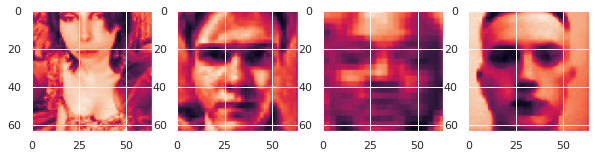

In [31]:
fig, axx = plt.subplots(1, 4, figsize=(10, 5))

for i in range(4):
    img = X_test[i+90]
    axx[i].imshow(img)

### Searching features via HOG

In [46]:
hog_img_train = []
for i in range(len(X_train_Aug)):
    fd, hog_image = hog(X_train_Aug[i], orientations=8, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True)
    hog_img_train.append(hog_image)

In [47]:
hog_img_test = []
for i in range(len(X_test)):
    fd, hog_image = hog(X_test[i], orientations=8, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True)
    hog_img_test.append(hog_image)

In [ ]:
hog_img_train_no_haar = []
for i in range(len(X_no_haar)):
    fd, hog_image = hog(X_no_haar[i], orientations=8, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True)
    hog_img_train_no_haar.append(hog_image)

In [ ]:
hog_img_test_no_haar = []
for i in range(len(X_test_no_haar)):
    fd, hog_image = hog(X_test_no_haar[i], orientations=8, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True)
    hog_img_test.append(hog_image)

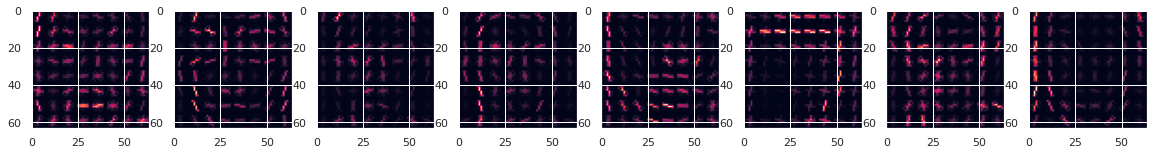

In [34]:
fig, axx = plt.subplots(1, 8, figsize=(20, 10))

for i in range(8):
    img = hog_img_test[i+45]
    axx[i].imshow(img)

### 2. Model fitting

In [48]:
X_train_flatten = np.array([el.ravel() for el in hog_img_train])
X_test_flatten = np.array([el.ravel() for el in hog_img_test])


In [49]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train_flatten, y_train_Aug, stratify=y_train_Aug, random_state=42)

### Appying PCA  

Text(0, 0.5, 'variance')

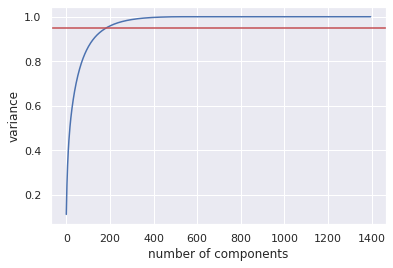

In [50]:
pca = PCA().fit(X_tr, y_tr)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=0.95, color='r', linestyle='-')
plt.xlabel('number of components')
plt.ylabel('variance')

In [51]:
scl = StandardScaler()
pca = KernelPCA()
model_svm = SVC(probability=True)

pipe = Pipeline(steps=[('scl', scl), ('pca', pca), ('svm', model_svm)])

param_grid = {
    "pca__n_components": [i for i in range(130, 165, 5)],
    "pca__kernel": ['rbf', 'poly', 'linear'],
    'svm__C': [i for i in range(1, 15, 2)],
    'svm__kernel': ['rbf', 'poly', 'linear'],
}

grid = GridSearchCV(estimator = pipe, param_grid = param_grid, 
                           scoring = 'accuracy', cv = 10, 
                           n_jobs = -1, verbose = 2)

grid.fit(X_tr, y_tr)

print(f"best mean cross-validation score: {grid.best_score_}")
print(f"best parameters: {grid.best_params_}")
print(f"val-set score: {grid.score(X_val, y_val):.3f}")

Fitting 10 folds for each of 441 candidates, totalling 4410 fits
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=1, svm__kernel=poly; total time=   3.0s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=1, svm__kernel=poly; total time=   2.9s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=1, svm__kernel=linear; total time=   2.6s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=3, svm__kernel=rbf; total time=   2.7s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=3, svm__kernel=linear; total time=   2.6s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=5, svm__kernel=rbf; total time=   3.3s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=5, svm__kernel=poly; total time=   3.8s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=7, svm__kernel=rbf; total time=   3.4s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=7, svm__kernel=poly; total time=   3.2s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=9, svm__kernel

[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=1, svm__kernel=rbf; total time=   3.6s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=1, svm__kernel=linear; total time=   2.5s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=1, svm__kernel=linear; total time=   2.5s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=3, svm__kernel=rbf; total time=   2.4s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=3, svm__kernel=poly; total time=   2.5s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=5, svm__kernel=rbf; total time=   3.5s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=5, svm__kernel=poly; total time=   3.5s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=7, svm__kernel=rbf; total time=   3.9s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=7, svm__kernel=poly; total time=   3.1s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=9, svm__kernel=rbf; total time=   3.5s
[CV] END pca__kernel=rbf, pca__n_componen

[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=1, svm__kernel=rbf; total time=   3.6s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=1, svm__kernel=poly; total time=   3.0s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=3, svm__kernel=rbf; total time=   3.1s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=3, svm__kernel=poly; total time=   2.2s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=3, svm__kernel=linear; total time=   1.7s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=5, svm__kernel=rbf; total time=   3.1s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=5, svm__kernel=poly; total time=   2.7s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=5, svm__kernel=linear; total time=   1.7s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=7, svm__kernel=rbf; total time=   3.1s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=7, svm__kernel=poly; total time=   3.0s
[CV] END pca__kernel=rbf, pca__n_compone

[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=1, svm__kernel=rbf; total time=   3.7s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=1, svm__kernel=poly; total time=   3.5s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=3, svm__kernel=rbf; total time=   3.1s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=3, svm__kernel=poly; total time=   2.6s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=3, svm__kernel=linear; total time=   2.6s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=5, svm__kernel=poly; total time=   3.1s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=5, svm__kernel=linear; total time=   1.6s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=5, svm__kernel=linear; total time=   2.9s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=7, svm__kernel=poly; total time=   2.6s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=7, svm__kernel=linear; total time=   1.7s
[CV] END pca__kernel=rbf, pca__n_c

[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=1, svm__kernel=rbf; total time=   3.7s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=1, svm__kernel=poly; total time=   3.0s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=3, svm__kernel=rbf; total time=   3.4s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=3, svm__kernel=poly; total time=   2.5s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=3, svm__kernel=linear; total time=   2.4s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=5, svm__kernel=rbf; total time=   3.0s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=5, svm__kernel=linear; total time=   2.0s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=5, svm__kernel=linear; total time=   2.6s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=7, svm__kernel=rbf; total time=   2.6s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=7, svm__kernel=linear; total time=   1.8s
[CV] END pca__kernel=rbf, pca__n_com

[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=1, svm__kernel=rbf; total time=   3.6s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=1, svm__kernel=linear; total time=   2.7s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=1, svm__kernel=linear; total time=   2.8s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=3, svm__kernel=poly; total time=   2.4s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=3, svm__kernel=linear; total time=   1.9s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=5, svm__kernel=rbf; total time=   3.4s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=5, svm__kernel=poly; total time=   2.9s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=5, svm__kernel=linear; total time=   2.2s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=7, svm__kernel=rbf; total time=   2.9s
[CV] END pca__kernel=rbf, pca__n_components=130, svm__C=7, svm__kernel=poly; total time=   3.9s
[CV] END pca__kernel=rbf, pca__n_co

[CV] END pca__kernel=rbf, pca__n_components=150, svm__C=9, svm__kernel=linear; total time=   2.0s
[CV] END pca__kernel=rbf, pca__n_components=150, svm__C=9, svm__kernel=linear; total time=   2.6s
[CV] END pca__kernel=rbf, pca__n_components=150, svm__C=11, svm__kernel=poly; total time=   2.7s
[CV] END pca__kernel=rbf, pca__n_components=150, svm__C=11, svm__kernel=linear; total time=   1.9s
[CV] END pca__kernel=rbf, pca__n_components=150, svm__C=13, svm__kernel=rbf; total time=   4.1s
[CV] END pca__kernel=rbf, pca__n_components=150, svm__C=13, svm__kernel=poly; total time=   3.9s
[CV] END pca__kernel=rbf, pca__n_components=155, svm__C=1, svm__kernel=rbf; total time=   3.7s
[CV] END pca__kernel=rbf, pca__n_components=155, svm__C=1, svm__kernel=poly; total time=   3.3s
[CV] END pca__kernel=rbf, pca__n_components=155, svm__C=3, svm__kernel=rbf; total time=   4.6s
[CV] END pca__kernel=rbf, pca__n_components=155, svm__C=3, svm__kernel=poly; total time=   3.4s
[CV] END pca__kernel=rbf, pca__n_

[CV] END pca__kernel=rbf, pca__n_components=150, svm__C=11, svm__kernel=linear; total time=   3.0s
[CV] END pca__kernel=rbf, pca__n_components=150, svm__C=13, svm__kernel=poly; total time=   2.9s
[CV] END pca__kernel=rbf, pca__n_components=150, svm__C=13, svm__kernel=linear; total time=   2.1s
[CV] END pca__kernel=rbf, pca__n_components=155, svm__C=1, svm__kernel=rbf; total time=   3.7s
[CV] END pca__kernel=rbf, pca__n_components=155, svm__C=1, svm__kernel=poly; total time=   3.0s
[CV] END pca__kernel=rbf, pca__n_components=155, svm__C=1, svm__kernel=linear; total time=   2.5s
[CV] END pca__kernel=rbf, pca__n_components=155, svm__C=3, svm__kernel=rbf; total time=   3.1s
[CV] END pca__kernel=rbf, pca__n_components=155, svm__C=3, svm__kernel=linear; total time=   2.2s
[CV] END pca__kernel=rbf, pca__n_components=155, svm__C=3, svm__kernel=linear; total time=   2.9s
[CV] END pca__kernel=rbf, pca__n_components=155, svm__C=5, svm__kernel=rbf; total time=   3.3s
[CV] END pca__kernel=rbf, pca_

[CV] END pca__kernel=rbf, pca__n_components=150, svm__C=11, svm__kernel=rbf; total time=   3.5s
[CV] END pca__kernel=rbf, pca__n_components=150, svm__C=11, svm__kernel=poly; total time=   3.1s
[CV] END pca__kernel=rbf, pca__n_components=150, svm__C=11, svm__kernel=linear; total time=   2.8s
[CV] END pca__kernel=rbf, pca__n_components=150, svm__C=13, svm__kernel=poly; total time=   2.8s
[CV] END pca__kernel=rbf, pca__n_components=150, svm__C=13, svm__kernel=linear; total time=   1.9s
[CV] END pca__kernel=rbf, pca__n_components=150, svm__C=13, svm__kernel=linear; total time=   2.6s
[CV] END pca__kernel=rbf, pca__n_components=155, svm__C=1, svm__kernel=poly; total time=   2.9s
[CV] END pca__kernel=rbf, pca__n_components=155, svm__C=1, svm__kernel=linear; total time=   3.2s
[CV] END pca__kernel=rbf, pca__n_components=155, svm__C=3, svm__kernel=rbf; total time=   3.6s
[CV] END pca__kernel=rbf, pca__n_components=155, svm__C=3, svm__kernel=poly; total time=   3.6s
[CV] END pca__kernel=rbf, pc

[CV] END pca__kernel=rbf, pca__n_components=150, svm__C=13, svm__kernel=linear; total time=   2.5s
[CV] END pca__kernel=rbf, pca__n_components=155, svm__C=1, svm__kernel=rbf; total time=   3.1s
[CV] END pca__kernel=rbf, pca__n_components=155, svm__C=1, svm__kernel=linear; total time=   2.4s
[CV] END pca__kernel=rbf, pca__n_components=155, svm__C=1, svm__kernel=linear; total time=   3.0s
[CV] END pca__kernel=rbf, pca__n_components=155, svm__C=3, svm__kernel=poly; total time=   2.8s
[CV] END pca__kernel=rbf, pca__n_components=155, svm__C=3, svm__kernel=linear; total time=   2.2s
[CV] END pca__kernel=rbf, pca__n_components=155, svm__C=5, svm__kernel=rbf; total time=   3.9s
[CV] END pca__kernel=rbf, pca__n_components=155, svm__C=5, svm__kernel=poly; total time=   3.0s
[CV] END pca__kernel=rbf, pca__n_components=155, svm__C=5, svm__kernel=linear; total time=   2.6s
[CV] END pca__kernel=rbf, pca__n_components=155, svm__C=7, svm__kernel=rbf; total time=   3.5s
[CV] END pca__kernel=rbf, pca__n

[CV] END pca__kernel=rbf, pca__n_components=150, svm__C=13, svm__kernel=linear; total time=   1.6s
[CV] END pca__kernel=rbf, pca__n_components=155, svm__C=1, svm__kernel=rbf; total time=   4.2s
[CV] END pca__kernel=rbf, pca__n_components=155, svm__C=1, svm__kernel=poly; total time=   3.2s
[CV] END pca__kernel=rbf, pca__n_components=155, svm__C=1, svm__kernel=linear; total time=   3.0s
[CV] END pca__kernel=rbf, pca__n_components=155, svm__C=3, svm__kernel=poly; total time=   2.9s
[CV] END pca__kernel=rbf, pca__n_components=155, svm__C=3, svm__kernel=linear; total time=   2.0s
[CV] END pca__kernel=rbf, pca__n_components=155, svm__C=5, svm__kernel=rbf; total time=   3.6s
[CV] END pca__kernel=rbf, pca__n_components=155, svm__C=5, svm__kernel=poly; total time=   2.7s
[CV] END pca__kernel=rbf, pca__n_components=155, svm__C=5, svm__kernel=linear; total time=   1.8s
[CV] END pca__kernel=rbf, pca__n_components=155, svm__C=7, svm__kernel=rbf; total time=   4.1s
[CV] END pca__kernel=rbf, pca__n_c

[CV] END pca__kernel=rbf, pca__n_components=150, svm__C=13, svm__kernel=poly; total time=   3.0s
[CV] END pca__kernel=rbf, pca__n_components=155, svm__C=1, svm__kernel=rbf; total time=   3.7s
[CV] END pca__kernel=rbf, pca__n_components=155, svm__C=1, svm__kernel=poly; total time=   3.0s
[CV] END pca__kernel=rbf, pca__n_components=155, svm__C=1, svm__kernel=linear; total time=   2.6s
[CV] END pca__kernel=rbf, pca__n_components=155, svm__C=3, svm__kernel=rbf; total time=   3.1s
[CV] END pca__kernel=rbf, pca__n_components=155, svm__C=3, svm__kernel=linear; total time=   2.0s
[CV] END pca__kernel=rbf, pca__n_components=155, svm__C=3, svm__kernel=linear; total time=   2.7s
[CV] END pca__kernel=rbf, pca__n_components=155, svm__C=5, svm__kernel=rbf; total time=   2.9s
[CV] END pca__kernel=rbf, pca__n_components=155, svm__C=5, svm__kernel=linear; total time=   2.0s
[CV] END pca__kernel=rbf, pca__n_components=155, svm__C=5, svm__kernel=linear; total time=   2.5s
[CV] END pca__kernel=rbf, pca__n

[CV] END pca__kernel=poly, pca__n_components=140, svm__C=7, svm__kernel=rbf; total time=   2.3s
[CV] END pca__kernel=poly, pca__n_components=140, svm__C=7, svm__kernel=poly; total time=   2.8s
[CV] END pca__kernel=poly, pca__n_components=140, svm__C=9, svm__kernel=rbf; total time=   3.2s
[CV] END pca__kernel=poly, pca__n_components=140, svm__C=9, svm__kernel=poly; total time=   3.8s
[CV] END pca__kernel=poly, pca__n_components=140, svm__C=9, svm__kernel=linear; total time=   2.6s
[CV] END pca__kernel=poly, pca__n_components=140, svm__C=11, svm__kernel=poly; total time=   2.6s
[CV] END pca__kernel=poly, pca__n_components=140, svm__C=11, svm__kernel=linear; total time=   1.5s
[CV] END pca__kernel=poly, pca__n_components=140, svm__C=11, svm__kernel=linear; total time=   2.2s
[CV] END pca__kernel=poly, pca__n_components=140, svm__C=13, svm__kernel=rbf; total time=   2.4s
[CV] END pca__kernel=poly, pca__n_components=140, svm__C=13, svm__kernel=poly; total time=   3.1s
[CV] END pca__kernel=p

[CV] END pca__kernel=poly, pca__n_components=140, svm__C=9, svm__kernel=linear; total time=   2.5s
[CV] END pca__kernel=poly, pca__n_components=140, svm__C=9, svm__kernel=linear; total time=   2.8s
[CV] END pca__kernel=poly, pca__n_components=140, svm__C=11, svm__kernel=rbf; total time=   2.6s
[CV] END pca__kernel=poly, pca__n_components=140, svm__C=11, svm__kernel=linear; total time=   2.5s
[CV] END pca__kernel=poly, pca__n_components=140, svm__C=13, svm__kernel=rbf; total time=   2.7s
[CV] END pca__kernel=poly, pca__n_components=140, svm__C=13, svm__kernel=poly; total time=   2.8s
[CV] END pca__kernel=poly, pca__n_components=140, svm__C=13, svm__kernel=linear; total time=   2.6s
[CV] END pca__kernel=poly, pca__n_components=145, svm__C=1, svm__kernel=rbf; total time=   2.9s
[CV] END pca__kernel=poly, pca__n_components=145, svm__C=1, svm__kernel=linear; total time=   2.1s
[CV] END pca__kernel=poly, pca__n_components=145, svm__C=1, svm__kernel=linear; total time=   2.6s
[CV] END pca__ke

[CV] END pca__kernel=poly, pca__n_components=140, svm__C=11, svm__kernel=poly; total time=   2.9s
[CV] END pca__kernel=poly, pca__n_components=140, svm__C=11, svm__kernel=linear; total time=   2.6s
[CV] END pca__kernel=poly, pca__n_components=140, svm__C=13, svm__kernel=poly; total time=   3.2s
[CV] END pca__kernel=poly, pca__n_components=140, svm__C=13, svm__kernel=linear; total time=   2.2s
[CV] END pca__kernel=poly, pca__n_components=145, svm__C=1, svm__kernel=rbf; total time=   2.7s
[CV] END pca__kernel=poly, pca__n_components=145, svm__C=1, svm__kernel=poly; total time=   2.6s
[CV] END pca__kernel=poly, pca__n_components=145, svm__C=1, svm__kernel=linear; total time=   2.2s
[CV] END pca__kernel=poly, pca__n_components=145, svm__C=3, svm__kernel=rbf; total time=   2.4s
[CV] END pca__kernel=poly, pca__n_components=145, svm__C=3, svm__kernel=poly; total time=   2.5s
[CV] END pca__kernel=poly, pca__n_components=145, svm__C=3, svm__kernel=linear; total time=   2.0s
[CV] END pca__kernel

[CV] END pca__kernel=poly, pca__n_components=140, svm__C=9, svm__kernel=rbf; total time=   3.1s
[CV] END pca__kernel=poly, pca__n_components=140, svm__C=9, svm__kernel=poly; total time=   3.4s
[CV] END pca__kernel=poly, pca__n_components=140, svm__C=9, svm__kernel=linear; total time=   2.4s
[CV] END pca__kernel=poly, pca__n_components=140, svm__C=11, svm__kernel=rbf; total time=   2.3s
[CV] END pca__kernel=poly, pca__n_components=140, svm__C=11, svm__kernel=poly; total time=   3.1s
[CV] END pca__kernel=poly, pca__n_components=140, svm__C=13, svm__kernel=rbf; total time=   3.0s
[CV] END pca__kernel=poly, pca__n_components=140, svm__C=13, svm__kernel=poly; total time=   3.0s
[CV] END pca__kernel=poly, pca__n_components=140, svm__C=13, svm__kernel=linear; total time=   2.7s
[CV] END pca__kernel=poly, pca__n_components=145, svm__C=1, svm__kernel=poly; total time=   2.8s
[CV] END pca__kernel=poly, pca__n_components=145, svm__C=1, svm__kernel=linear; total time=   2.4s
[CV] END pca__kernel=p

[CV] END pca__kernel=poly, pca__n_components=140, svm__C=13, svm__kernel=rbf; total time=   2.9s
[CV] END pca__kernel=poly, pca__n_components=140, svm__C=13, svm__kernel=poly; total time=   3.2s
[CV] END pca__kernel=poly, pca__n_components=140, svm__C=13, svm__kernel=linear; total time=   2.5s
[CV] END pca__kernel=poly, pca__n_components=145, svm__C=1, svm__kernel=rbf; total time=   2.7s
[CV] END pca__kernel=poly, pca__n_components=145, svm__C=1, svm__kernel=linear; total time=   2.3s
[CV] END pca__kernel=poly, pca__n_components=145, svm__C=3, svm__kernel=rbf; total time=   2.9s
[CV] END pca__kernel=poly, pca__n_components=145, svm__C=3, svm__kernel=poly; total time=   2.4s
[CV] END pca__kernel=poly, pca__n_components=145, svm__C=3, svm__kernel=linear; total time=   1.7s
[CV] END pca__kernel=poly, pca__n_components=145, svm__C=5, svm__kernel=rbf; total time=   2.9s
[CV] END pca__kernel=poly, pca__n_components=145, svm__C=5, svm__kernel=poly; total time=   3.1s
[CV] END pca__kernel=poly

[CV] END pca__kernel=poly, pca__n_components=140, svm__C=11, svm__kernel=poly; total time=   2.7s
[CV] END pca__kernel=poly, pca__n_components=140, svm__C=13, svm__kernel=rbf; total time=   2.9s
[CV] END pca__kernel=poly, pca__n_components=140, svm__C=13, svm__kernel=poly; total time=   2.8s
[CV] END pca__kernel=poly, pca__n_components=140, svm__C=13, svm__kernel=linear; total time=   3.0s
[CV] END pca__kernel=poly, pca__n_components=145, svm__C=1, svm__kernel=poly; total time=   2.8s
[CV] END pca__kernel=poly, pca__n_components=145, svm__C=1, svm__kernel=linear; total time=   2.4s
[CV] END pca__kernel=poly, pca__n_components=145, svm__C=3, svm__kernel=rbf; total time=   3.1s
[CV] END pca__kernel=poly, pca__n_components=145, svm__C=3, svm__kernel=poly; total time=   3.1s
[CV] END pca__kernel=poly, pca__n_components=145, svm__C=3, svm__kernel=linear; total time=   2.9s
[CV] END pca__kernel=poly, pca__n_components=145, svm__C=5, svm__kernel=poly; total time=   3.1s
[CV] END pca__kernel=p

[CV] END pca__kernel=linear, pca__n_components=130, svm__C=3, svm__kernel=rbf; total time=   2.6s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=3, svm__kernel=poly; total time=   2.4s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=5, svm__kernel=rbf; total time=   3.0s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=5, svm__kernel=poly; total time=   2.9s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=5, svm__kernel=linear; total time=   2.4s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=7, svm__kernel=rbf; total time=   2.3s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=7, svm__kernel=linear; total time=   1.5s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=7, svm__kernel=linear; total time=   2.5s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=9, svm__kernel=poly; total time=   2.2s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=9, svm__kernel=linear; total time=   1.7s
[CV] 

[CV] END pca__kernel=linear, pca__n_components=130, svm__C=5, svm__kernel=rbf; total time=   2.6s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=5, svm__kernel=poly; total time=   2.6s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=7, svm__kernel=rbf; total time=   2.9s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=7, svm__kernel=poly; total time=   3.2s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=9, svm__kernel=rbf; total time=   3.0s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=9, svm__kernel=poly; total time=   2.8s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=11, svm__kernel=rbf; total time=   3.5s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=11, svm__kernel=poly; total time=   3.0s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=13, svm__kernel=rbf; total time=   3.1s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=13, svm__kernel=poly; total time=   2.6s
[CV] END pc

[CV] END pca__kernel=linear, pca__n_components=130, svm__C=3, svm__kernel=poly; total time=   2.2s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=5, svm__kernel=rbf; total time=   3.0s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=5, svm__kernel=poly; total time=   2.6s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=5, svm__kernel=linear; total time=   2.5s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=7, svm__kernel=poly; total time=   2.5s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=7, svm__kernel=linear; total time=   1.5s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=9, svm__kernel=rbf; total time=   3.2s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=9, svm__kernel=poly; total time=   2.5s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=9, svm__kernel=linear; total time=   1.9s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=11, svm__kernel=rbf; total time=   2.6s
[CV] E

[CV] END pca__kernel=linear, pca__n_components=130, svm__C=5, svm__kernel=poly; total time=   2.3s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=5, svm__kernel=linear; total time=   1.7s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=7, svm__kernel=rbf; total time=   2.9s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=7, svm__kernel=poly; total time=   2.4s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=9, svm__kernel=rbf; total time=   3.5s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=9, svm__kernel=poly; total time=   3.2s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=11, svm__kernel=rbf; total time=   3.0s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=11, svm__kernel=poly; total time=   2.7s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=11, svm__kernel=linear; total time=   2.5s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=13, svm__kernel=poly; total time=   2.6s
[CV] 

[CV] END pca__kernel=linear, pca__n_components=130, svm__C=9, svm__kernel=rbf; total time=   3.1s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=9, svm__kernel=poly; total time=   2.6s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=9, svm__kernel=linear; total time=   2.0s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=11, svm__kernel=rbf; total time=   2.6s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=11, svm__kernel=poly; total time=   2.6s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=13, svm__kernel=rbf; total time=   3.1s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=13, svm__kernel=poly; total time=   2.8s
[CV] END pca__kernel=linear, pca__n_components=135, svm__C=1, svm__kernel=rbf; total time=   3.2s
[CV] END pca__kernel=linear, pca__n_components=135, svm__C=1, svm__kernel=poly; total time=   2.5s
[CV] END pca__kernel=linear, pca__n_components=135, svm__C=1, svm__kernel=linear; total time=   2.3s
[CV] E

[CV] END pca__kernel=linear, pca__n_components=130, svm__C=9, svm__kernel=linear; total time=   1.8s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=9, svm__kernel=linear; total time=   2.1s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=11, svm__kernel=rbf; total time=   2.5s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=11, svm__kernel=linear; total time=   1.7s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=11, svm__kernel=linear; total time=   2.2s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=13, svm__kernel=rbf; total time=   2.4s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=13, svm__kernel=linear; total time=   1.6s
[CV] END pca__kernel=linear, pca__n_components=130, svm__C=13, svm__kernel=linear; total time=   2.2s
[CV] END pca__kernel=linear, pca__n_components=135, svm__C=1, svm__kernel=rbf; total time=   2.5s
[CV] END pca__kernel=linear, pca__n_components=135, svm__C=1, svm__kernel=linear; total time= 

In [52]:
pred = grid.best_estimator_.predict(X_val)
from sklearn.metrics import accuracy_score
accuracy_score(y_val, pred)

0.8497854077253219

In [ ]:
scl_no_haar = StandardScaler()
pca_no_haar = KernelPCA()
model_svm_no_haar = SVC(probability=True)

pipe_no_haar = Pipeline(steps=[('scl', scl_no_haar), ('pca', pca_no_haar), ('svm', model_svm_no_haar)])

param_grid_no_haar = {
    "pca__n_components": [i for i in range(125, 160, 5)],
    "pca__kernel": ['rbf', 'poly', 'linear'],
    'svm__C': [i for i in range(3, 15, 2)],
    'svm__kernel': ['rbf', 'poly', 'linear'],
}

grid_no_haar = GridSearchCV(estimator = pipe_no_haar, param_grid = param_grid_no_haar, 
                           scoring = 'accuracy', cv = 10, 
                           n_jobs = -1, verbose = 2)

grid_no_haar.fit(X_tr, y_tr)

print(f"best mean cross-validation score: {grid_no_haar.best_score_}")
print(f"best parameters: {grid_no_haar.best_params_}")
print(f"val-set score: {grid_no_haar.score(X_val, y_val):.3f}")

'''

grid_no_haar.fit(X_tr_no_haar, y_tr)

print(f"best mean cross-validation score: {grid_no_haar.best_score_}")
print(f"best parameters: {grid_no_haar.best_params_}")
print(f"val-set score: {grid_no_haar.score(X_val_no_haar, y_val_no_haar):.3f}")
'''

Fitting 10 folds for each of 378 candidates, totalling 3780 fits


In [53]:
grid.best_estimator_.fit(X_train_flatten, y_train_Aug)
pred = grid.best_estimator_.predict(X_test_flatten)
pred_df = pd.DataFrame(list(zip(Names, pred)), columns = ['img', 'label'])
pred_df.head()
probas = grid.best_estimator_.predict_proba(X_test_flatten)
max_probas = [max(el) for el in probas]

In [13]:

print(f"best mean cross-validation score: {grid_no_haar.best_score_}")
print(f"best parameters: {grid_no_haar.best_params_}")
print(f"val-set score: {grid_no_haar.score(X_val, y_val):.3f}")

best mean cross-validation score: 0.8285851709338464
best parameters: {'pca__kernel': 'linear', 'pca__n_components': 135, 'svm__C': 5, 'svm__kernel': 'rbf'}
val-set score: 0.820
[CV] END pca__kernel=linear, pca__n_components=135, svm__C=9, svm__kernel=poly; total time=   8.9s
[CV] END pca__kernel=linear, pca__n_components=135, svm__C=9, svm__kernel=linear; total time=   6.8s
[CV] END pca__kernel=linear, pca__n_components=135, svm__C=11, svm__kernel=rbf; total time=   9.6s
[CV] END pca__kernel=linear, pca__n_components=135, svm__C=11, svm__kernel=linear; total time=   8.2s
[CV] END pca__kernel=linear, pca__n_components=135, svm__C=11, svm__kernel=linear; total time=   8.8s
[CV] END pca__kernel=linear, pca__n_components=135, svm__C=13, svm__kernel=rbf; total time=   9.1s
[CV] END pca__kernel=linear, pca__n_components=135, svm__C=13, svm__kernel=linear; total time=   6.6s
[CV] END pca__kernel=linear, pca__n_components=140, svm__C=3, svm__kernel=rbf; total time=  12.3s
[CV] END pca__kernel

[CV] END pca__kernel=linear, pca__n_components=135, svm__C=13, svm__kernel=rbf; total time=  11.0s
[CV] END pca__kernel=linear, pca__n_components=135, svm__C=13, svm__kernel=poly; total time=   9.0s
[CV] END pca__kernel=linear, pca__n_components=135, svm__C=13, svm__kernel=linear; total time=   7.0s
[CV] END pca__kernel=linear, pca__n_components=140, svm__C=3, svm__kernel=rbf; total time=   9.8s
[CV] END pca__kernel=linear, pca__n_components=140, svm__C=3, svm__kernel=poly; total time=  10.5s
[CV] END pca__kernel=linear, pca__n_components=140, svm__C=5, svm__kernel=rbf; total time=  11.9s
[CV] END pca__kernel=linear, pca__n_components=140, svm__C=5, svm__kernel=poly; total time=  10.7s
[CV] END pca__kernel=linear, pca__n_components=140, svm__C=7, svm__kernel=rbf; total time=  12.2s
[CV] END pca__kernel=linear, pca__n_components=140, svm__C=7, svm__kernel=poly; total time=  10.4s
[CV] END pca__kernel=linear, pca__n_components=140, svm__C=7, svm__kernel=linear; total time=   9.4s
[CV] EN

[CV] END pca__kernel=linear, pca__n_components=135, svm__C=13, svm__kernel=rbf; total time=  12.3s
[CV] END pca__kernel=linear, pca__n_components=135, svm__C=13, svm__kernel=poly; total time=   9.0s
[CV] END pca__kernel=linear, pca__n_components=135, svm__C=13, svm__kernel=linear; total time=   8.0s
[CV] END pca__kernel=linear, pca__n_components=140, svm__C=3, svm__kernel=rbf; total time=   9.3s
[CV] END pca__kernel=linear, pca__n_components=140, svm__C=3, svm__kernel=linear; total time=   7.8s
[CV] END pca__kernel=linear, pca__n_components=140, svm__C=5, svm__kernel=rbf; total time=  11.8s
[CV] END pca__kernel=linear, pca__n_components=140, svm__C=5, svm__kernel=poly; total time=   8.5s
[CV] END pca__kernel=linear, pca__n_components=140, svm__C=5, svm__kernel=linear; total time=   5.3s
[CV] END pca__kernel=linear, pca__n_components=140, svm__C=7, svm__kernel=rbf; total time=  11.3s
[CV] END pca__kernel=linear, pca__n_components=140, svm__C=7, svm__kernel=poly; total time=  11.1s
[CV] 

[CV] END pca__kernel=linear, pca__n_components=135, svm__C=13, svm__kernel=linear; total time=   6.0s
[CV] END pca__kernel=linear, pca__n_components=135, svm__C=13, svm__kernel=linear; total time=   9.7s
[CV] END pca__kernel=linear, pca__n_components=140, svm__C=3, svm__kernel=poly; total time=   6.9s
[CV] END pca__kernel=linear, pca__n_components=140, svm__C=3, svm__kernel=linear; total time=   7.1s
[CV] END pca__kernel=linear, pca__n_components=140, svm__C=3, svm__kernel=linear; total time=   9.4s
[CV] END pca__kernel=linear, pca__n_components=140, svm__C=5, svm__kernel=poly; total time=   6.7s
[CV] END pca__kernel=linear, pca__n_components=140, svm__C=5, svm__kernel=linear; total time=   6.8s
[CV] END pca__kernel=linear, pca__n_components=140, svm__C=5, svm__kernel=linear; total time=   8.3s
[CV] END pca__kernel=linear, pca__n_components=140, svm__C=7, svm__kernel=rbf; total time=   8.6s
[CV] END pca__kernel=linear, pca__n_components=140, svm__C=7, svm__kernel=linear; total time=   

[CV] END pca__kernel=linear, pca__n_components=135, svm__C=11, svm__kernel=linear; total time=   9.0s
[CV] END pca__kernel=linear, pca__n_components=135, svm__C=13, svm__kernel=rbf; total time=   9.0s
[CV] END pca__kernel=linear, pca__n_components=135, svm__C=13, svm__kernel=linear; total time=   6.9s
[CV] END pca__kernel=linear, pca__n_components=140, svm__C=3, svm__kernel=rbf; total time=  11.7s
[CV] END pca__kernel=linear, pca__n_components=140, svm__C=3, svm__kernel=poly; total time=  10.1s
[CV] END pca__kernel=linear, pca__n_components=140, svm__C=3, svm__kernel=linear; total time=   7.7s
[CV] END pca__kernel=linear, pca__n_components=140, svm__C=5, svm__kernel=rbf; total time=   8.6s
[CV] END pca__kernel=linear, pca__n_components=140, svm__C=5, svm__kernel=linear; total time=   7.1s
[CV] END pca__kernel=linear, pca__n_components=140, svm__C=5, svm__kernel=linear; total time=   8.8s
[CV] END pca__kernel=linear, pca__n_components=140, svm__C=7, svm__kernel=poly; total time=   7.9s


In [14]:
grid_no_haar.best_estimator_.fit(X_train_flatten, y_train_Aug)
pred_no_haar = grid_no_haar.best_estimator_.predict(X_test_flatten)
pred_df_no_haar = pd.DataFrame(list(zip(Names, pred_no_haar)), columns = ['img_name_no_haar', 'pred_class_no_haar'])
pred_df_no_haar.head()
pred_df_no_haar.to_csv("submission_no_haar.csv", index=False)

#### Probabilities

<AxesSubplot:>

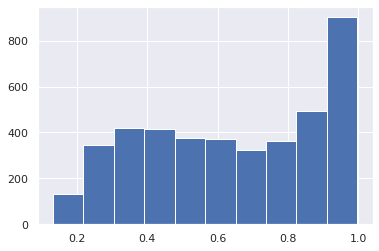

In [61]:
pred_df['proba'] = max_probas
pred_df['proba'].hist()




### Changing predictions for images, where main model not so sure, to result of model without Haar Cascades.

In [62]:
pred_no_haar = pd.read_csv('submission_no_haar.csv', header=0)
results = pd.concat([pred_df,pred_no_haar], axis = 1)

In [63]:
results['label'] = np.where(results['proba'] < 0.4, 
                                    results['pred_class_no_haar'], results['label'])
pred_df = results.drop(['proba', 'img_name_no_haar', 'pred_class_no_haar'], axis=1)
pred_df.to_csv("submission_best.csv", index=False)
pred_df.head()

,img,label
0,img0.jpg,7
1,img1.jpg,17
2,img2.jpg,14
3,img3.jpg,11
4,img4.jpg,16


In [29]:

pred_df.to_csv("next_submission.csv", index=False)

[CV] END pca__kernel=linear, pca__n_components=140, svm__C=15, svm__kernel=linear; total time=   8.1s
[CV] END pca__kernel=linear, pca__n_components=140, svm__C=17, svm__kernel=poly; total time=   8.0s
[CV] END pca__kernel=linear, pca__n_components=140, svm__C=17, svm__kernel=linear; total time=   6.3s
[CV] END pca__kernel=linear, pca__n_components=140, svm__C=19, svm__kernel=rbf; total time=  10.7s
[CV] END pca__kernel=linear, pca__n_components=140, svm__C=19, svm__kernel=poly; total time=   9.0s
[CV] END pca__kernel=linear, pca__n_components=140, svm__C=19, svm__kernel=linear; total time=   8.6s
[CV] END pca__kernel=linear, pca__n_components=145, svm__C=3, svm__kernel=rbf; total time=   8.0s
[CV] END pca__kernel=linear, pca__n_components=145, svm__C=3, svm__kernel=linear; total time=   5.7s
[CV] END pca__kernel=linear, pca__n_components=145, svm__C=5, svm__kernel=rbf; total time=  11.0s
[CV] END pca__kernel=linear, pca__n_components=145, svm__C=5, svm__kernel=poly; total time=   9.5s

[CV] END pca__kernel=linear, pca__n_components=140, svm__C=19, svm__kernel=rbf; total time=  11.0s
[CV] END pca__kernel=linear, pca__n_components=140, svm__C=19, svm__kernel=poly; total time=   8.5s
[CV] END pca__kernel=linear, pca__n_components=140, svm__C=19, svm__kernel=linear; total time=   7.8s
[CV] END pca__kernel=linear, pca__n_components=145, svm__C=3, svm__kernel=rbf; total time=   7.9s
[CV] END pca__kernel=linear, pca__n_components=145, svm__C=3, svm__kernel=poly; total time=   8.5s
[CV] END pca__kernel=linear, pca__n_components=145, svm__C=5, svm__kernel=rbf; total time=  10.9s
[CV] END pca__kernel=linear, pca__n_components=145, svm__C=5, svm__kernel=poly; total time=   9.1s
[CV] END pca__kernel=linear, pca__n_components=145, svm__C=5, svm__kernel=linear; total time=   8.0s
[CV] END pca__kernel=linear, pca__n_components=145, svm__C=7, svm__kernel=rbf; total time=   8.2s
[CV] END pca__kernel=linear, pca__n_components=145, svm__C=7, svm__kernel=linear; total time=   6.6s
[CV] 

[CV] END pca__kernel=linear, pca__n_components=140, svm__C=17, svm__kernel=linear; total time=   6.4s
[CV] END pca__kernel=linear, pca__n_components=140, svm__C=19, svm__kernel=rbf; total time=   8.3s
[CV] END pca__kernel=linear, pca__n_components=140, svm__C=19, svm__kernel=poly; total time=   9.1s
[CV] END pca__kernel=linear, pca__n_components=145, svm__C=3, svm__kernel=rbf; total time=  10.9s
[CV] END pca__kernel=linear, pca__n_components=145, svm__C=3, svm__kernel=poly; total time=   8.9s
[CV] END pca__kernel=linear, pca__n_components=145, svm__C=3, svm__kernel=linear; total time=   8.5s
[CV] END pca__kernel=linear, pca__n_components=145, svm__C=5, svm__kernel=poly; total time=   7.9s
[CV] END pca__kernel=linear, pca__n_components=145, svm__C=5, svm__kernel=linear; total time=   6.4s
[CV] END pca__kernel=linear, pca__n_components=145, svm__C=7, svm__kernel=rbf; total time=  11.5s
[CV] END pca__kernel=linear, pca__n_components=145, svm__C=7, svm__kernel=poly; total time=   8.8s
[CV]

[CV] END pca__kernel=linear, pca__n_components=140, svm__C=19, svm__kernel=rbf; total time=  10.8s
[CV] END pca__kernel=linear, pca__n_components=140, svm__C=19, svm__kernel=poly; total time=   8.5s
[CV] END pca__kernel=linear, pca__n_components=140, svm__C=19, svm__kernel=linear; total time=   6.9s
[CV] END pca__kernel=linear, pca__n_components=145, svm__C=3, svm__kernel=rbf; total time=   8.3s
[CV] END pca__kernel=linear, pca__n_components=145, svm__C=3, svm__kernel=poly; total time=   8.5s
[CV] END pca__kernel=linear, pca__n_components=145, svm__C=5, svm__kernel=rbf; total time=  11.9s
[CV] END pca__kernel=linear, pca__n_components=145, svm__C=5, svm__kernel=poly; total time=  10.8s
[CV] END pca__kernel=linear, pca__n_components=145, svm__C=7, svm__kernel=rbf; total time=  10.4s
[CV] END pca__kernel=linear, pca__n_components=145, svm__C=7, svm__kernel=poly; total time=   9.6s
[CV] END pca__kernel=linear, pca__n_components=145, svm__C=7, svm__kernel=linear; total time=  12.2s
[CV] EN

[CV] END pca__kernel=linear, pca__n_components=140, svm__C=17, svm__kernel=poly; total time=   9.0s
[CV] END pca__kernel=linear, pca__n_components=140, svm__C=17, svm__kernel=linear; total time=   8.6s
[CV] END pca__kernel=linear, pca__n_components=140, svm__C=19, svm__kernel=poly; total time=   7.8s
[CV] END pca__kernel=linear, pca__n_components=140, svm__C=19, svm__kernel=linear; total time=   5.7s
[CV] END pca__kernel=linear, pca__n_components=145, svm__C=3, svm__kernel=rbf; total time=  10.6s
[CV] END pca__kernel=linear, pca__n_components=145, svm__C=3, svm__kernel=poly; total time=   8.8s
[CV] END pca__kernel=linear, pca__n_components=145, svm__C=3, svm__kernel=linear; total time=   8.0s
[CV] END pca__kernel=linear, pca__n_components=145, svm__C=5, svm__kernel=rbf; total time=   8.6s
[CV] END pca__kernel=linear, pca__n_components=145, svm__C=5, svm__kernel=linear; total time=   6.5s
[CV] END pca__kernel=linear, pca__n_components=145, svm__C=5, svm__kernel=linear; total time=   8.2